# Spectral Analysis of Deterministic Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Window Functions

For the discussion of the leakage effect in the [previous section](leakage_effect.ipynb), a hard truncation of the signal $x[k]$ by a rectangular window $w[k] = \text{rect}_N[k]$ was assumed. Also other window functions are used for spectral analysis. The resulting properties depend on the spectrum $W(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ of the window function, since the spectrum of the windowed signal is given by periodic convolution $X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \frac{1}{2 \pi} X(\mathrm{e}^{\,\mathrm{j}\, \Omega}) \circledast W(\mathrm{e}^{\,\mathrm{j}\, \Omega})$. For an exponential signal $x[k] = \mathrm{e}^{\mathrm{j} \Omega_0 k}$ this operation will result in a cyclic shift of the spectrum of the window function $W(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ by $\Omega_0$.

Different window functions have different properties. For instance with respect to the capability to distinguish two neighboring signals (frequency resolution) or to detect two signals when one is much weaker (sidelobe level). Since these two aspects counteract for typical window functions, the choice of a suitable window depends heavily on the application. First a look is taken at frequently applied window functions and their spectral properties. Then the window functions are compared by commonly used evaluation metrics.

In order to investigate the windows, a function is defined which computes and plots the magnitude spectrum of a given window function. The discrete-time Fourier transform (DTFT) $W(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ is approximated numerically by the DFT.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


def dft_window_function(w):
    
    N = len(w)
    
    # DFT of window function
    W = np.fft.fft(w, 8192)
    W = np.fft.fftshift(W)
    W = W / np.amax(W) + np.nextafter(0,1)
    mu = np.linspace(-np.pi, np.pi, 8192)

    # plot window function and its spectrum
    plt.rcParams['figure.figsize'] = 10, 5
    plt.stem(w, basefmt=' ', use_line_collection=True)
    plt.xlabel(r'$k$')
    plt.ylabel(r'$w[k]$')
    plt.axis([-1, N+1, -0.1, 1.1])
    plt.grid()

    plt.figure()
    plt.plot(mu, 20*np.log10(np.abs(W)))
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$| W(e^{j \Omega}) |$ in dB')
    plt.axis([-np.pi, np.pi, -100, 5])
    plt.grid()

### Rectangular Window

The [rectangular window](https://en.wikipedia.org/wiki/Window_function#Rectangular_window) $w[k] = \text{rect}_N[k]$ takes all samples with equal weight into account. The main lobe of its magnitude spectrum is narrow, but the level of the side lobes is rather high. It has the highest frequency selectivity.

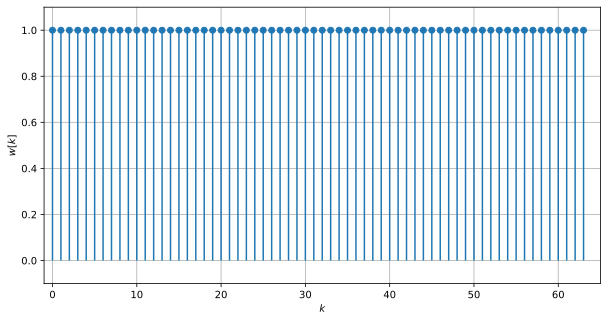

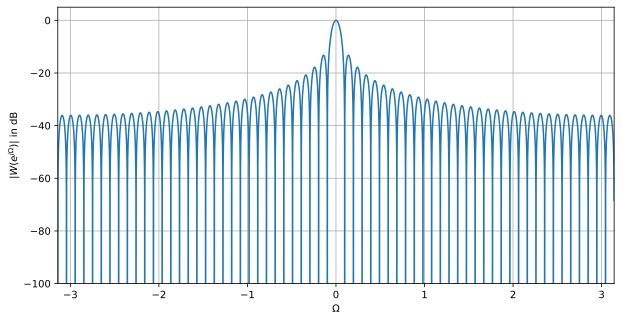

In [2]:
dft_window_function(np.ones(64))

### Triangular Window

For an odd window length $2N - 1$, the [triangular window](https://en.wikipedia.org/wiki/Window_function#Triangular_window) can be expressed as the convolution of two rectangular windows $w[k] = \text{rect}_N[k] * \text{rect}_N[k]$. The main lobe is wider than for the rectangular window, but the level of the side lobes decays faster.

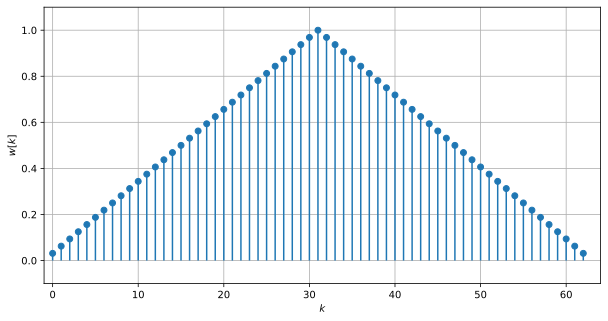

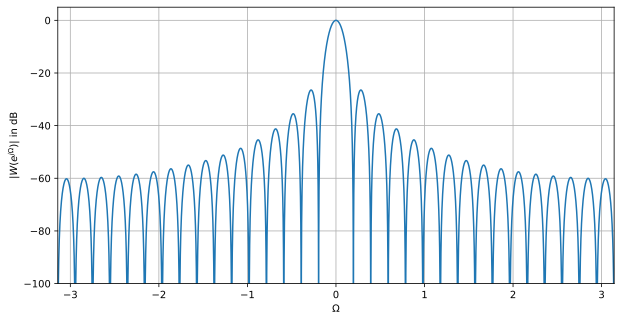

In [3]:
dft_window_function(sig.triang(63))

### Hanning Window

The [Hanning window](https://en.wikipedia.org/wiki/Window_function#Hann_.28Hanning.29_window) $w[k] = \frac{1}{2} ( 1 - \cos(2 \pi \frac{k}{N}))$ is a smooth window whose first and last value is zero. It features a fast decay of the side lobes.

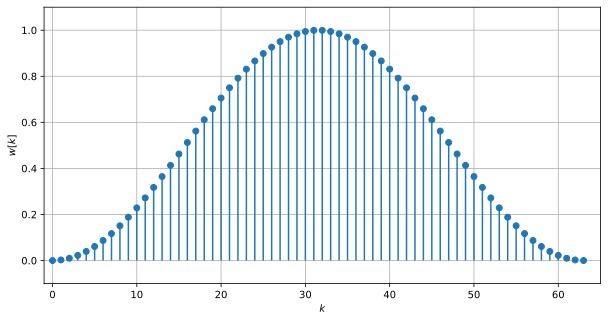

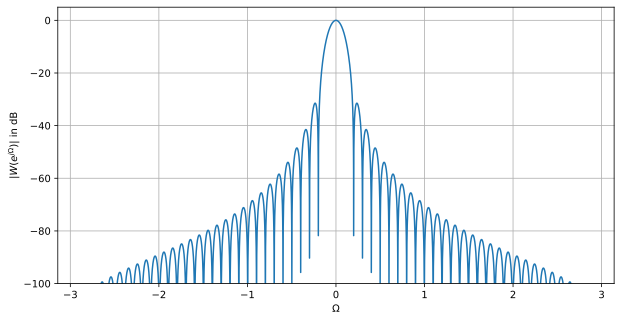

In [4]:
dft_window_function(np.hanning(64))

### Hamming Window

The [Hamming window](https://en.wikipedia.org/wiki/Window_function#Hamming_window) $w[k] =  0.54 - 0.46 \cos(2 \pi \frac{k}{N})$ is a smooth window function whose first and last value is not zero. The level of the side lobes is approximately constant.

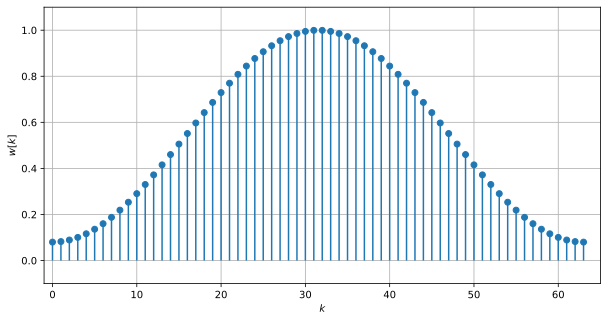

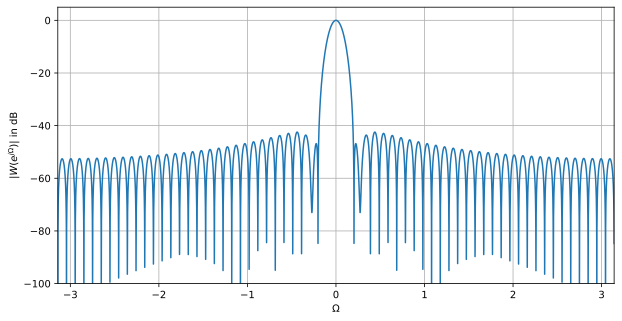

In [5]:
dft_window_function(np.hamming(64))

### Blackman Window

The [Blackman window](https://en.wikipedia.org/wiki/Window_function#Blackman_windows) $w[k] =  0.42 - 0.5 \cos(2 \pi \frac{k}{N}) + 0.08 \cos(4 \pi \frac{k}{N})$ features a rapid decay of side lobes at the cost of a wide main lobe and low frequency selectivity.

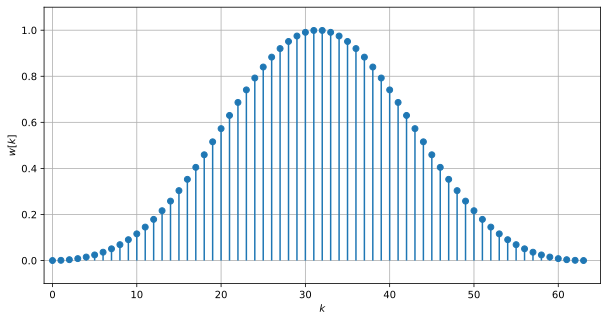

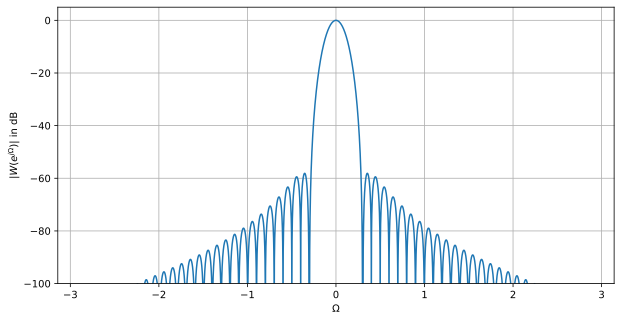

In [6]:
dft_window_function(np.blackman(64))

### Comparison of Window Functions

Besides inspecting the DTFT of the window functions also various evaluation metrics are used for the comparison or selection of window functions. Three of the most prominent measures in spectral analysis are

1. **Width of the main lobe**:
The width of the main lobe in terms of normalized frequency is measured between the two points where its maximum value is dropped by half (- 3dB). This measure is linked to the capability to detect two exponential signals with comparable levels and similar frequencies.

2. **Relative amplitude of side lobes**:
Ratio in terms of amplitude between the maximum of the main lobe and the maximum level of the side lobes. This measure is linked to the detection performance when two or more exponential signals with disparate levels and dissimilar frequencies are present.

3. **Maximum sampling error**:
Maximum amplitude error when the maximum of the main lobe is not hit by sampling the spectrum. It is defined as the ratio between the amplitude of the main lobe and the amplitude at $\Omega = \frac{\pi}{N}$. This measure provides insight into the maximum possible error when extracting the amplitude of harmonic signals from their DFT.

The following table lists the values of these metrics for the introduced window functions:

| window function | main lobe width | side lobe level | sampling error |
|---|:---:|:---:|:---:|
| [rectangular](#Rectangular-Window) | $\frac{4 \pi}{N + 1}$ | - 13 dB | 3.92 dB |
| [triangular](#Triangular-Window) | $\frac{8 \pi}{N}$ | - 25 dB | 1.82 dB |
| [Hanning](#Hanning-Window) | $\frac{8 \pi}{N}$ | - 31 dB | 1.42 dB |
| [Hamming](#Hamming-Window) | $\frac{8 \pi}{N}$ | - 41 dB | 1.78 dB |
| [Blackman](#Blackman-Window) | $\frac{12 \pi}{N}$ | - 57 dB | 1.10 dB |

It is evident from the table that a lower side lobe level has a wider main lobe as consequence.

### Analysis of Signal Mixtures by the Windowed Discrete Fourier Transformation

The analysis of signal mixtures by the windowed DFT is illustrated by numerical examples. For this purpose, the function for the analysis of a [superposition of two exponential signals from the previous section](leakage_effect.ipynb#Analysis-of-signal-mixtures-by-the-discrete-Fourier-transformation) is extended by windowing the signal before taking its DFT.

In [7]:
def dft_signal_mixture_window(N, A1, P1, A2, P2, w):
    # N: length of signal/DFT
    # A1, P1, A2, P2: amplitude and periodicity of 1st/2nd complex exponential
    # window applied to the signal
    
    # generate the signal mixture
    Om0_1 = P1*(2*np.pi/N)  # frequency of 1st exponential signal
    Om0_2 = P2*(2*np.pi/N)  # frequency of 2nd exponential signal
    k = np.arange(N)
    x = A1 * np.exp(1j*Om0_1*k) + A2 * np.exp(1j*Om0_2*k)
    x = x * w

    # DFT of the signal mixture
    mu = np.arange(N)
    X = np.fft.fft(x)

    # plot spectrum
    plt.figure(figsize = (10, 8))
    plt.stem(mu, abs(X), basefmt = ' ')
    plt.title(r'Absolute value of the DFT of a signal mixture')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$|X[\mu]|$')
    plt.axis([0, N, -0.5, abs(X).max()+5])
    plt.grid()

Now the last example is re-investigated by using a Blackman window which features a high suppression of the sidelobes.

/Users/spors/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


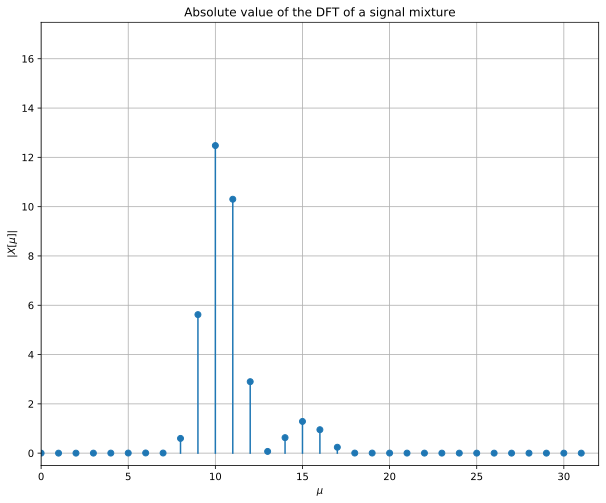

In [8]:
dft_signal_mixture_window(32, 1, 10.3, 0.1, 15.2, np.blackman(32))

The second exponential signal with the lower level now becomes visible in the spectrum.

**Exercise**

* Examine the effect of the other window functions for small/large frequency and level differences. What window function is best suited for what situation?

Solution: The rectangular window function is well suited to identify two or more exponential signals with comparable amplitudes and only minor differences in frequency. This is due to its narrow main lobe. Window functions that feature a higher decay of the side lobes are well suited for the identification of exponential signals with rather different levels and frequencies.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.